In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


def get_csv_data(filename: str) -> np.ndarray:
    df = pd.read_csv(filename, sep=',', header=None)
    df = df.iloc[1:, :]
    arr = df.to_numpy()
    return arr.astype(float)

3.6669985988464714e-05 0.08930230634920128 2188.0126377465695
[[0.00000000e+00 3.00000000e+01]
 [2.83923304e-05 2.99680000e+01]
 [5.67846608e-05 2.76140000e+01]
 ...
 [1.99626475e-01 5.99900000e+00]
 [1.99654867e-01 4.03200000e+00]
 [1.99683260e-01 6.00000000e+00]]


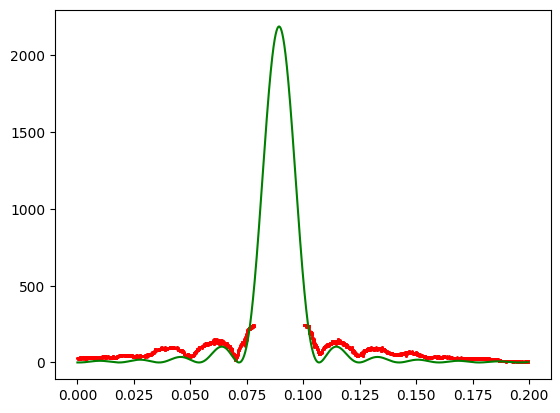

In [11]:
# get_fitted_diffraction
m_per_pixel = 0.007 * 11 / 2712
def diffraction_equation(y, a, y_0, I_0):
    L = 1
    lambd = 650 * 10**(-9)
    return I_0 * (np.sin((np.pi*a*(y-y_0))/(L*lambd)) / (np.pi*a*(y-y_0)/(L*lambd)))**2

vals = get_csv_data("single_slit.csv")
vals = vals[vals[:,1]<245,:]
vals *= np.tile(np.array([m_per_pixel, 1]), (vals.shape[0],1))
a, y_0, I_0 = scipy.optimize.curve_fit(diffraction_equation, vals[:,0], vals[:,1], 
                                        p0=[0.04/1000, 0.0894,300])[0]
plt.plot(vals[:,0], vals[:,1], "ro", markersize=1)
y_range = np.linspace(0, np.max(vals[:,0]), 10000)
print(a, y_0, I_0)
print(vals)
plt.plot(y_range, diffraction_equation(y_range, a, y_0, I_0), "g-", markersize=1)
plt.show()

In [7]:
# get_fitted_interference
m_per_pixel = 0.007 * 11 / 2712
def interference_equation(y, a, y_0, I_0, d):
    L = 1
    lambd = 650 * 10**(-9)
    return I_0 * (np.sin((np.pi*a*(y-y_0))/(L*lambd)) / (np.pi*a*(y-y_0)/(L*lambd)))**2 * (np.cos((np.pi*d*y)/(L*lambd)))**2

vals = get_csv_data("interference/single_slit.csv")
vals = vals[vals[:,1]<245,:]
vals *= np.tile(np.array([m_per_pixel, 1]), (vals.shape[0],1))
a, y_0, I_0 = scipy.optimize.curve_fit(interference_equation, vals[:,0], vals[:,1], 
                                        p0=[0.04/1000, 0.0894,300])[0]
plt.plot(vals[:,0], vals[:,1], "ro", markersize=1)
y_range = np.linspace(0, np.max(vals[:,0]), 10000)
print(a, y_0, I_0)
print(vals)
plt.plot(y_range, interference_equation(y_range, a, y_0, I_0), "g-", markersize=1)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'interference/single_slit.csv'